<a href="https://colab.research.google.com/github/Ines8991/classification_rna/blob/main/Calcul_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dans ce fichier nous allons calculer la performance de notre modèle sur les données de l'année 2022

In [2]:
don=pd.read_excel(r'/content/Ines - Liste des étudiants avec notes par session 22-08-2023.xlsx')
don.columns.tolist()

["Année de l'inscription",
 'IAE - Etape (code)',
 'IAE - Etape (lib.)',
 'Individu - Code Etudiant',
 'Note Session 1',
 'Résultat Session 1',
 'Note Session 2',
 'Résultat Session 2']

In [3]:
don=don.reset_index(drop=True)


In [4]:
don.head(1)

,Année de l'inscription,IAE - Etape (code),IAE - Etape (lib.),Individu - Code Etudiant,Note Session 1,Résultat Session 1,Note Session 2,Résultat Session 2
0,2022,B1GEII,BUT1 Génie électrique,20200070,NaN,NaN,NaN,NaN


In [5]:
don['Résultat Session 2'].unique()

array([nan, 'Admis', 'Ajourné', 'Défaillant', 'Red. Non auto.',
       'Pas. Condition.', 'Période césure', 'Abs justifiée'], dtype=object)

In [6]:
redou=[]
for i in range(len(don)):
  if don['Résultat Session 2'][i]=="Admis" or don['Résultat Session 2'][i]=="Pas. Condition.":
    redou.append(1)
  else:
    redou.append(0)


df_redou = pd.DataFrame(redou, columns=['Nombre d\'admis VET'])

print(df_redou)
don1=don.assign(Nombre_d_admis_VET=df_redou["Nombre d'admis VET"])
don1['Nombre_d_admis_VET'].value_counts()

       Nombre d'admis VET
0                       0
1                       0
2                       0
3                       0
4                       0
...                   ...
10122                   1
10123                   0
10124                   0
10125                   1
10126                   1

[10127 rows x 1 columns]


0    5890
1    4237
Name: Nombre_d_admis_VET, dtype: int64

In [7]:
don1.head(1)

,Année de l'inscription,IAE - Etape (code),IAE - Etape (lib.),Individu - Code Etudiant,Note Session 1,Résultat Session 1,Note Session 2,Résultat Session 2,Nombre_d_admis_VET
0,2022,B1GEII,BUT1 Génie électrique,20200070,NaN,NaN,NaN,NaN,0


In [8]:
ca=pd.read_excel(r'/content/Ines - caractéristiques des étudiants depuis 2012 v2 (1).xlsx')
ca.shape

(119684, 45)

In [171]:
pred=pd.read_excel(r'/content/prediction_licence1 (69).xlsx')
#pred=pd.read_excel(r'/content/nouvpred (3).xlsx')
pred.shape

(499, 9)

In [172]:
ca2021=ca[ca['Année de l\'inscription']==2021]
ca2021.shape

(11172, 45)

In [173]:
cali1=ca2021[ca2021["Type d'étape"]=="L1"]
cali1=cali1[cali1['Nombre d’admis VET']==0]
calili=pd.merge(cali1,don1,on="Individu - Code Etudiant")
calili.shape

(641, 53)

In [174]:
cli=calili.reset_index(drop=True)


In [175]:
cli.columns.tolist()

["Année de l'inscription_x",
 'Niveau',
 "Type d'étape",
 'Diplôme SISE intitulé 1 (lib.)',
 'IAE - Etape (lib.)_x',
 'Individu - Code Etudiant',
 'Individu - Sexe',
 'Nationalité (code)',
 'Nationalité (lib.)',
 'Nationalité - continent',
 'Adresse fixe - Code postal',
 'Naissance - Date',
 'Age au bac',
 "Bac - Année d'obtention",
 'Bac ou équivalence (code)',
 'Groupe de bac',
 'Série du bac',
 'Spécialité 1 du bac NBGE',
 'Bac - Mention (lib.)',
 'Situation année précédente (lib.)',
 'Diplôme SISE (type)',
 'Discipline SISE (code)',
 'Discipline SISE (lib.)',
 'Secteur disciplinaire SISE (code)',
 'Secteur disciplinaire SISE (lib.)',
 'Niveau dans le diplôme (calc)',
 'PCS - parent (code)',
 'PCS - parent (lib.)',
 "Régime d'inscription (code)",
 "Régime d'inscription (lib.)",
 'Boursier (O/N)',
 'Composante',
 'Cursus LMD',
 'IAE - Etape (code)_x',
 'Etudiant oui ou oui-si',
 "Année 1ère inscript. dans l'étab.",
 'Année de dernière inscription',
 'Nombre d’admis VET',
 'Adresse fi

In [176]:
rna=[]
for i in range(len(cli)):
  if (cli["Nombre d’admis VET"][i]==0) & (cli['Nombre_d_admis_VET'][i]==0):
    rna.append("RNA")
  else:
    rna.append("NonRNA")


In [177]:
df_rna = pd.DataFrame(rna, columns=['RNA_2023'])

print(df_rna)
don2=cli.assign(RNA_2023=df_rna["RNA_2023"])
don2.shape

    RNA_2023
0     NonRNA
1        RNA
2     NonRNA
3        RNA
4        RNA
5     NonRNA
6        RNA
7        RNA
8        RNA
9     NonRNA
10    NonRNA
11       RNA
12    NonRNA
13       RNA
14       RNA
15       RNA
16       RNA
17       RNA
18       RNA
19       RNA
20    NonRNA
21       RNA
22       RNA
23       RNA
24       RNA
25       RNA
26       RNA
27    NonRNA
28       RNA
29       RNA
30       RNA
31       RNA
32       RNA
33       RNA
34    NonRNA
35       RNA
36       RNA
37    NonRNA
38       RNA
39       RNA
40       RNA
41       RNA
42    NonRNA
43       RNA
44    NonRNA
45    NonRNA
46    NonRNA
47       RNA
48       RNA
49    NonRNA
50       RNA
51       RNA
52    NonRNA
53    NonRNA
54       RNA
55    NonRNA
56    NonRNA
57    NonRNA
58       RNA
59    NonRNA
60       RNA
61    NonRNA
62       RNA
63       RNA
64    NonRNA
65       RNA
66    NonRNA
67    NonRNA
68    NonRNA
69    NonRNA
70       RNA
71       RNA
72       RNA
73       RNA
74       RNA
75       RNA

(641, 54)

In [178]:
file8='rna.xlsx'
df_rna.to_excel(file8)
print("Success")

Success


In [179]:
df_rna.value_counts()

RNA_2023
RNA         381
NonRNA      260
dtype: int64

In [180]:
don2.columns.tolist()

["Année de l'inscription_x",
 'Niveau',
 "Type d'étape",
 'Diplôme SISE intitulé 1 (lib.)',
 'IAE - Etape (lib.)_x',
 'Individu - Code Etudiant',
 'Individu - Sexe',
 'Nationalité (code)',
 'Nationalité (lib.)',
 'Nationalité - continent',
 'Adresse fixe - Code postal',
 'Naissance - Date',
 'Age au bac',
 "Bac - Année d'obtention",
 'Bac ou équivalence (code)',
 'Groupe de bac',
 'Série du bac',
 'Spécialité 1 du bac NBGE',
 'Bac - Mention (lib.)',
 'Situation année précédente (lib.)',
 'Diplôme SISE (type)',
 'Discipline SISE (code)',
 'Discipline SISE (lib.)',
 'Secteur disciplinaire SISE (code)',
 'Secteur disciplinaire SISE (lib.)',
 'Niveau dans le diplôme (calc)',
 'PCS - parent (code)',
 'PCS - parent (lib.)',
 "Régime d'inscription (code)",
 "Régime d'inscription (lib.)",
 'Boursier (O/N)',
 'Composante',
 'Cursus LMD',
 'IAE - Etape (code)_x',
 'Etudiant oui ou oui-si',
 "Année 1ère inscript. dans l'étab.",
 'Année de dernière inscription',
 'Nombre d’admis VET',
 'Adresse fi

In [181]:
pred=pred.rename(columns={'IndividuCodeEtudiant':'Individu - Code Etudiant'})
inter=pd.merge(pred,don2,on="Individu - Code Etudiant")
inter.shape

(497, 62)

In [182]:
for i in range(len(inter)):
  if (inter['Résultat Session 2'][i]=="Red. Non auto.") or (inter['Résultat Session 1'][i]=="Red. Non auto."):
    inter['RNA_2023'][i]="RNA"

<ipython-input-182-fb7865b5159f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inter['RNA_2023'][i]="RNA"


In [183]:
file3='intersec.xlsx'
inter.to_excel(file3)
print("Success")

Success


In [184]:
inter.columns.tolist()

['Unnamed: 0',
 'Individu - Code Etudiant',
 'Note Session 1_Année_N',
 'Résultat Session 1_Année_N',
 'Note Session 2_Année_N',
 'Résultat Session 2_Année_N',
 'Série du bac_x',
 'Predictions_RNA',
 'Probabilité_RNA',
 "Année de l'inscription_x",
 'Niveau',
 "Type d'étape",
 'Diplôme SISE intitulé 1 (lib.)',
 'IAE - Etape (lib.)_x',
 'Individu - Sexe',
 'Nationalité (code)',
 'Nationalité (lib.)',
 'Nationalité - continent',
 'Adresse fixe - Code postal',
 'Naissance - Date',
 'Age au bac',
 "Bac - Année d'obtention",
 'Bac ou équivalence (code)',
 'Groupe de bac',
 'Série du bac_y',
 'Spécialité 1 du bac NBGE',
 'Bac - Mention (lib.)',
 'Situation année précédente (lib.)',
 'Diplôme SISE (type)',
 'Discipline SISE (code)',
 'Discipline SISE (lib.)',
 'Secteur disciplinaire SISE (code)',
 'Secteur disciplinaire SISE (lib.)',
 'Niveau dans le diplôme (calc)',
 'PCS - parent (code)',
 'PCS - parent (lib.)',
 "Régime d'inscription (code)",
 "Régime d'inscription (lib.)",
 'Boursier (O/N)

In [185]:
n=0
for i in range(len(inter)):
  #if inter['RNA_2023'][i]==inter['Prediction_RNA_2022'][i]:
  if inter['RNA_2023'][i]==inter['Predictions_RNA'][i]:
    n=n+1

In [186]:
inter['RNA_2023'].value_counts()

RNA       303
NonRNA    194
Name: RNA_2023, dtype: int64

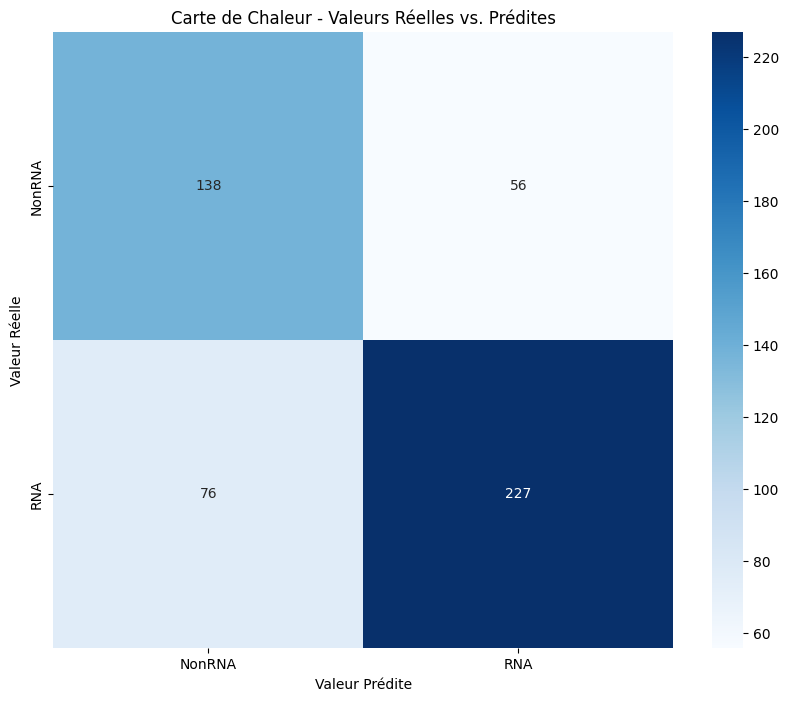

In [187]:

confusion_matrix = pd.crosstab(inter['RNA_2023'],inter['Predictions_RNA'] )

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Valeur Prédite')
plt.ylabel('Valeur Réelle')
plt.title('Carte de Chaleur - Valeurs Réelles vs. Prédites')
plt.show()


In [188]:
n/len(inter)

0.7344064386317908

In [189]:
inter['RNA_2023'].value_counts(normalize=False)

RNA       303
NonRNA    194
Name: RNA_2023, dtype: int64

In [190]:
nR=0
for i in range(len(inter)):
  if (inter['RNA_2023'][i]=="RNA") & (inter['Predictions_RNA'][i]=="RNA"):
  #if (inter['RNA_2023'][i]=="RNA") & (inter['Prediction_RNA_2022'][i]=="RNA"):
    nR=nR+1
nR

227

In [191]:
nR/317

0.7160883280757098

In [192]:
inter1=inter[['Individu - Code Etudiant','Predictions_RNA','Probabilité_RNA','RNA_2023']]
#inter1=inter[['Individu - Code Etudiant','Prediction_RNA_2022','Probabilité_RNA','RNA_2023']]
file5='pred_reduit.xlsx'
inter1.to_excel(file5)
print("Success")

Success


In [193]:
#predi=pd.read_excel(r'/content/pred_reduit.xlsx')


In [194]:
#nn=0
#for i in range(len(predi)):
  #if predi['Predictions_RNA'][i]==predi['RNA_2023'][i]:
    #nn=nn+1
#nn/len(predi)

In [195]:
selected = inter[(inter['RNA_2023'] == 'RNA') & (inter['Predictions_RNA'] == 'NonRNA')]
selected.shape

(76, 62)